<a href="https://colab.research.google.com/github/Yxy-0/TAM_2025-2S/blob/main/Parametros_polinomio_BayesianOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# Función cálculo varianza del ruido a partir del SNR dB
def var_snr(x, snrdB):
    Px = np.mean(x**2)  # potencia media de la señal
    return Px / (10**(snrdB/10))


In [3]:
# Parámetros de la función sinc
A = 10  # amplitud de la señal
Fo = 60  # frecuencia fundamental

# Vector tiempo
t = np.linspace(-0.1, 0.1, 1000)
t_sinc = t.copy()
t_sinc[t_sinc == 0] = 1e-10  # evitar división por cero

# Señal sinc limpia
tt = A * np.sin(2 * np.pi * Fo * t_sinc) / (2 * np.pi * Fo * t_sinc)


In [4]:
snrdB = 10  # SNR en dB
t_noisy = tt + np.sqrt(var_snr(tt, snrdB)) * np.random.randn(len(tt))


In [5]:
X = t.reshape(-1, 1)   # características (tiempo)
y = t_noisy            # variable objetivo (con ruido)
y_real = tt            # señal real sin ruido


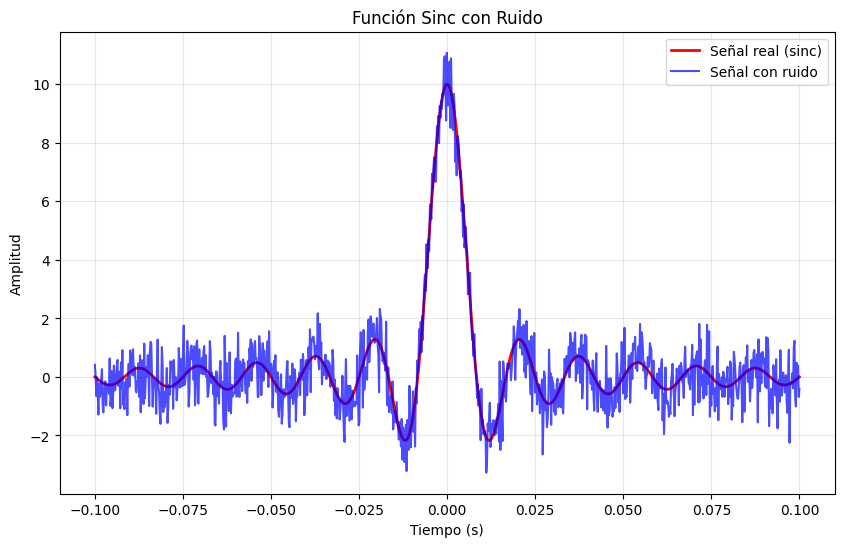

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(X, y_real, 'r-', linewidth=2, label='Señal real (sinc)')
plt.plot(X, y, 'b-', alpha=0.7, label='Señal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Función Sinc con Ruido')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [7]:
X_train, X_test, y_train, y_test, y_real_train, y_real_test = train_test_split(
    X, y, y_real, test_size=0.3, random_state=42, shuffle=True
)

print(f"Tamaño entrenamiento: {len(X_train)} muestras (70%)")
print(f"Tamaño prueba: {len(X_test)} muestras (30%)")


Tamaño entrenamiento: 700 muestras (70%)
Tamaño prueba: 300 muestras (30%)


In [8]:
max_order = 100
lambdaR = 1e-50  # <-- REGULARIZADOR (α en Ridge)

errors_train, errors_test = [], []
errors_true_train, errors_true_test = [], []

best_order, best_error, best_model = 0, float('inf'), None

print("Evaluando órdenes de polinomio...")

for Q in range(1, max_order + 1):
    phiQ = PolynomialFeatures(degree=Q)
    Phi_train = phiQ.fit_transform(X_train)
    Phi_test = phiQ.transform(X_test)
    Phi_all = phiQ.transform(X)

    # Modelo Ridge con regularización
    reg_mc = Ridge(alpha=lambdaR)  # <-- AQUÍ ESTÁ EL REGULARIZADOR
    reg_mc.fit(Phi_train, y_train)

    y_pred_train = reg_mc.predict(Phi_train)
    y_pred_test = reg_mc.predict(Phi_test)

    error_train = mean_squared_error(y_train, y_pred_train)
    error_test = mean_squared_error(y_test, y_pred_test)
    error_true_train = mean_squared_error(y_real_train, y_pred_train)
    error_true_test = mean_squared_error(y_real_test, y_pred_test)

    errors_train.append(error_train)
    errors_test.append(error_test)
    errors_true_train.append(error_true_train)
    errors_true_test.append(error_true_test)

    if error_true_test < best_error:
        best_error = error_true_test
        best_order = Q
        best_model = reg_mc
        best_phiQ = phiQ

    if Q % 10 == 0 or Q <= 5:
        print(f"Orden {Q:2d}: Error vs real (test) = {error_true_test:.6f}")


Evaluando órdenes de polinomio...
Orden  1: Error vs real (test) = 3.847739
Orden  2: Error vs real (test) = 3.618729
Orden  3: Error vs real (test) = 3.621106
Orden  4: Error vs real (test) = 3.380682
Orden  5: Error vs real (test) = 3.379800
Orden 10: Error vs real (test) = 2.706408
Orden 20: Error vs real (test) = 1.639593
Orden 30: Error vs real (test) = 1.639773
Orden 40: Error vs real (test) = 1.639830
Orden 50: Error vs real (test) = 1.639845


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.32721e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.32389e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.29839e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.29836e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.29818e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/pytho

Orden 60: Error vs real (test) = 1.639916
Orden 70: Error vs real (test) = 1.639826
Orden 80: Error vs real (test) = 1.639752
Orden 90: Error vs real (test) = 1.639773
Orden 100: Error vs real (test) = 1.639773


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.18793e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


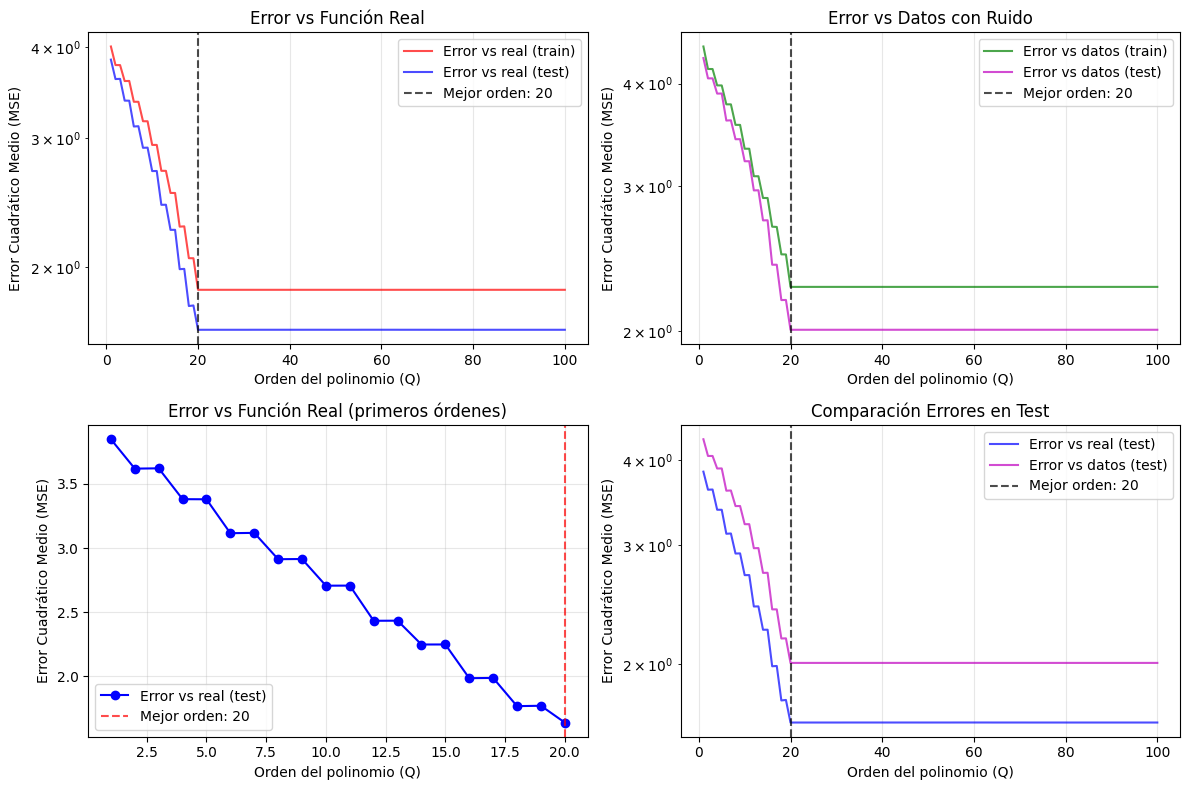

In [10]:
plt.figure(figsize=(12, 8))

# Gráfico 1: Errores vs función real
plt.subplot(2, 2, 1)
plt.plot(range(1, max_order + 1), errors_true_train, 'r-', label='Error vs real (train)', alpha=0.7)
plt.plot(range(1, max_order + 1), errors_true_test, 'b-', label='Error vs real (test)', alpha=0.7)
plt.axvline(x=best_order, color='k', linestyle='--', alpha=0.7, label=f'Mejor orden: {best_order}')
plt.xlabel('Orden del polinomio (Q)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Error vs Función Real')
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')

# Gráfico 2: Errores vs datos con ruido
plt.subplot(2, 2, 2)
plt.plot(range(1, max_order + 1), errors_train, 'g-', label='Error vs datos (train)', alpha=0.7)
plt.plot(range(1, max_order + 1), errors_test, 'm-', label='Error vs datos (test)', alpha=0.7)
plt.axvline(x=best_order, color='k', linestyle='--', alpha=0.7, label=f'Mejor orden: {best_order}')
plt.xlabel('Orden del polinomio (Q)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Error vs Datos con Ruido')
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')

# Gráfico 3: Zoom en los primeros órdenes
plt.subplot(2, 2, 3)
zoom_limit = min(20, max_order)
plt.plot(range(1, zoom_limit + 1), errors_true_test[:zoom_limit], 'bo-', label='Error vs real (test)')
plt.axvline(x=best_order if best_order <= zoom_limit else zoom_limit, color='r', linestyle='--',
            alpha=0.7, label=f'Mejor orden: {best_order}')
plt.xlabel('Orden del polinomio (Q)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Error vs Función Real (primeros órdenes)')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico 4: Comparación final
plt.subplot(2, 2, 4)
plt.semilogy(range(1, max_order + 1), errors_true_test, 'b-', label='Error vs real (test)', alpha=0.7)
plt.semilogy(range(1, max_order + 1), errors_test, 'm-', label='Error vs datos (test)', alpha=0.7)
plt.axvline(x=best_order, color='k', linestyle='--', alpha=0.7, label=f'Mejor orden: {best_order}')
plt.xlabel('Orden del polinomio (Q)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación Errores en Test')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


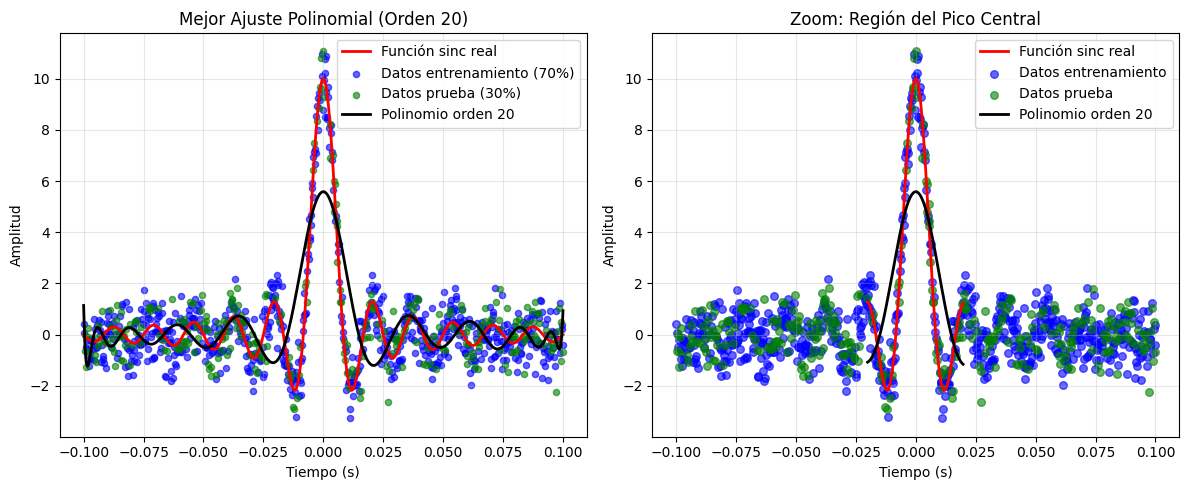

In [11]:
Phi_best = best_phiQ.transform(X)
y_pred_best = best_model.predict(Phi_best)

plt.figure(figsize=(12, 5))

# Gráfico completo
plt.subplot(1, 2, 1)
plt.plot(X, y_real, 'r-', linewidth=2, label='Función sinc real')
plt.scatter(X_train, y_train, c='blue', alpha=0.6, s=20, label='Datos entrenamiento (70%)')
plt.scatter(X_test, y_test, c='green', alpha=0.6, s=20, label='Datos prueba (30%)')
plt.plot(X, y_pred_best, 'k-', linewidth=2, label=f'Polinomio orden {best_order}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title(f'Mejor Ajuste Polinomial (Orden {best_order})')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom cerca del pico central
plt.subplot(1, 2, 2)
zoom_center = np.argmax(y_real)  # posición del pico central
zoom_range = 100
start = max(0, zoom_center - zoom_range)
end = min(len(X), zoom_center + zoom_range)

plt.plot(X[start:end], y_real[start:end], 'r-', linewidth=2, label='Función sinc real')
plt.scatter(X_train, y_train, c='blue', alpha=0.6, s=30, label='Datos entrenamiento')
plt.scatter(X_test, y_test, c='green', alpha=0.6, s=30, label='Datos prueba')
plt.plot(X[start:end], y_pred_best[start:end], 'k-', linewidth=2, label=f'Polinomio orden {best_order}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Zoom: Región del Pico Central')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


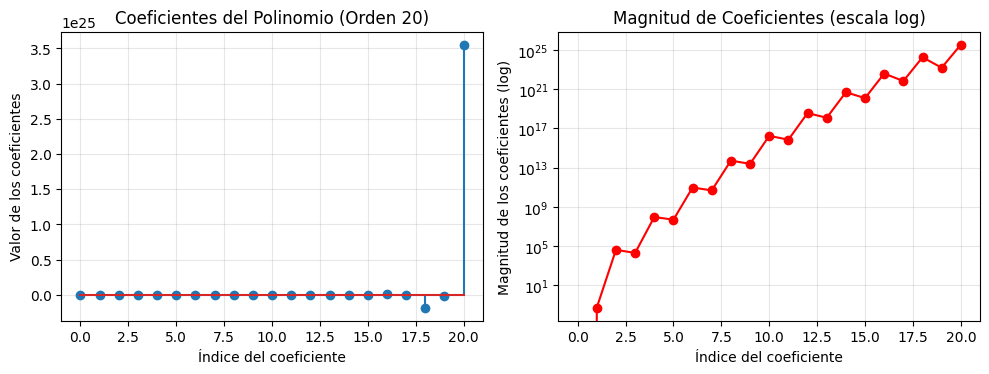

In [12]:
plt.figure(figsize=(10, 4))

# Coeficientes crudos
plt.subplot(1, 2, 1)
plt.stem(range(len(best_model.coef_)), best_model.coef_)
plt.ylabel('Valor de los coeficientes')
plt.xlabel('Índice del coeficiente')
plt.title(f'Coeficientes del Polinomio (Orden {best_order})')
plt.grid(True, alpha=0.3)

# Magnitud en escala log
plt.subplot(1, 2, 2)
plt.semilogy(range(len(best_model.coef_)), np.abs(best_model.coef_), 'ro-')
plt.ylabel('Magnitud de los coeficientes (log)')
plt.xlabel('Índice del coeficiente')
plt.title('Magnitud de Coeficientes (escala log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
print("\n" + "="*50)
print("RESUMEN FINAL")
print("="*50)
print(f"Mejor orden del polinomio: {best_order}")
print(f"Error vs función real (test): {best_error:.6f}")
print(f"Error vs datos con ruido (test): {errors_test[best_order-1]:.6f}")
print(f"Tamaño entrenamiento: {len(X_train)} muestras (70%)")
print(f"Tamaño prueba: {len(X_test)} muestras (30%)")
print(f"Número de coeficientes: {len(best_model.coef_)}")



RESUMEN FINAL
Mejor orden del polinomio: 20
Error vs función real (test): 1.639593
Error vs datos con ruido (test): 2.008015
Tamaño entrenamiento: 700 muestras (70%)
Tamaño prueba: 300 muestras (30%)
Número de coeficientes: 21


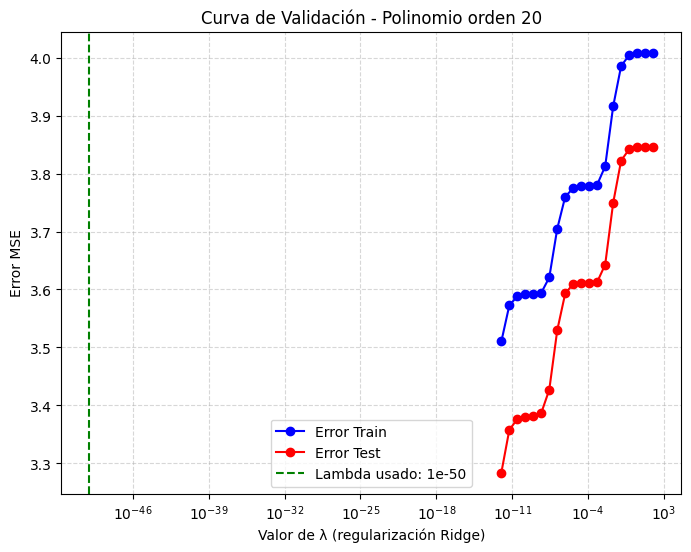

In [15]:
# === Celda 13: Curva de validación respecto a lambdaR ===
import numpy as np

# Rango de valores de lambda (regularización)
lambdas = np.logspace(-12, 2, 20)  # de 1e-12 a 1e2
errors_train_lambda = []
errors_test_lambda = []

phiQ_optimo = PolynomialFeatures(degree=best_order)
Phi_train_opt = phiQ_optimo.fit_transform(X_train)
Phi_test_opt = phiQ_optimo.transform(X_test)

for lam in lambdas:
    model = Ridge(alpha=lam)
    model.fit(Phi_train_opt, y_real_train)

    y_pred_train = model.predict(Phi_train_opt)
    y_pred_test = model.predict(Phi_test_opt)

    errors_train_lambda.append(mean_squared_error(y_real_train, y_pred_train))
    errors_test_lambda.append(mean_squared_error(y_real_test, y_pred_test))

plt.figure(figsize=(8, 6))
plt.semilogx(lambdas, errors_train_lambda, 'b-o', label="Error Train")
plt.semilogx(lambdas, errors_test_lambda, 'r-o', label="Error Test")
plt.axvline(lambdaR, color='g', linestyle='--', label=f"Lambda usado: {lambdaR}")
plt.xlabel("Valor de λ (regularización Ridge)")
plt.ylabel("Error MSE")
plt.title(f"Curva de Validación - Polinomio orden {best_order}")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.72557e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.76839e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.70677e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.8124e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.71521e-51): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python

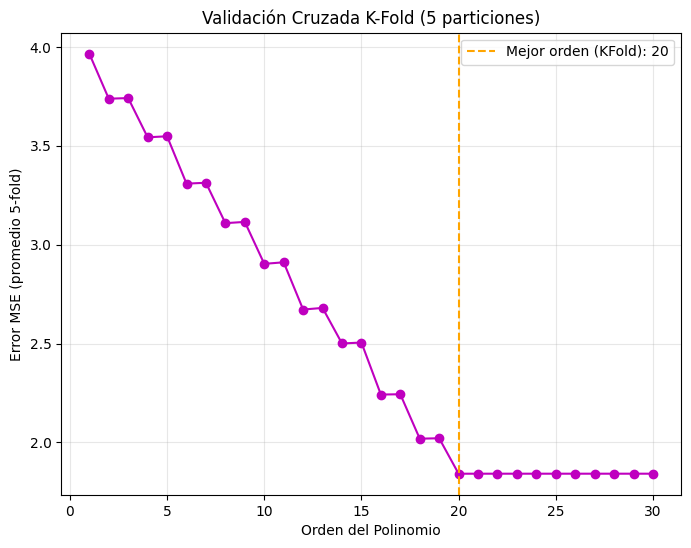

✅ Mejor orden según validación cruzada K-Fold: 20


In [25]:
# === Celda 14: Validación Cruzada K-Fold ===
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
errors_kfold = []

for Q in range(1, 31):  # probar hasta orden 30
    phiQ = PolynomialFeatures(degree=Q)
    Phi = phiQ.fit_transform(X)

    model = Ridge(alpha=lambdaR)
    scores = cross_val_score(model, Phi, y_real,
                            scoring=make_scorer(mean_squared_error, greater_is_better=False),
                            cv=kf)
    errors_kfold.append(-scores.mean())

best_order_kfold = np.argmin(errors_kfold) + 1

plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), errors_kfold, 'm-o')
plt.axvline(best_order_kfold, color='orange', linestyle='--',
            label=f"Mejor orden (KFold): {best_order_kfold}")
plt.xlabel("Orden del Polinomio")
plt.ylabel("Error MSE (promedio 5-fold)")
plt.title("Validación Cruzada K-Fold (5 particiones)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"✅ Mejor orden según validación cruzada K-Fold: {best_order_kfold}")

=== COMPARACIÓN DE MÉTODOS ===
Original 70-30 : Orden 20
K-Fold (5)    : Orden 20


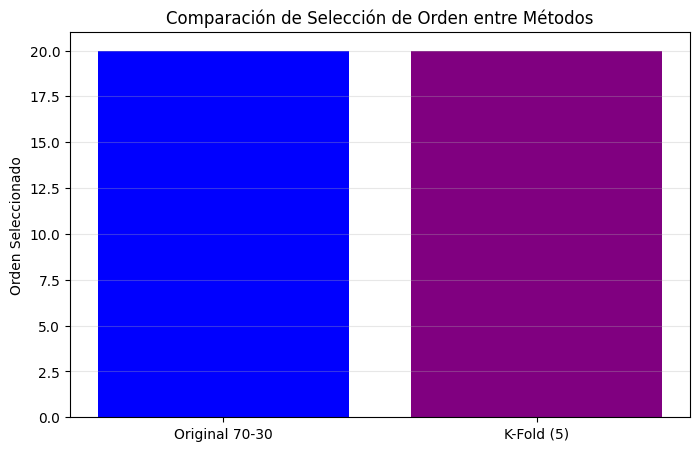

In [24]:
# === Celda 15: Comparación de Selección de Orden ===
print("=== COMPARACIÓN DE MÉTODOS ===")
print(f"Original 70-30 : Orden {best_order}")
print(f"K-Fold (5)    : Orden {best_order_kfold}")

# Gráfico resumen
plt.figure(figsize=(8, 5))
metodos = ["Original 70-30", "K-Fold (5)"]
ordenes = [best_order, best_order_kfold]

plt.bar(metodos, ordenes, color=['blue', 'purple'])
plt.ylabel("Orden Seleccionado")
plt.title("Comparación de Selección de Orden entre Métodos")
plt.grid(axis="y", alpha=0.3)
plt.show()

## Busqueda por Bayes

In [27]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 5.0 MB/s eta 0:00:00


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna
from optuna.samplers import GPSampler


In [29]:
# Señal sinc
A = 10   # Amplitud
Fo = 60  # Frecuencia fundamental
t = np.linspace(-0.1, 0.1, 1000)
t_sinc = t.copy()
t_sinc[t_sinc == 0] = 1e-10
y_real = A * np.sin(2 * np.pi * Fo * t_sinc) / (2 * np.pi * Fo * t_sinc)

# Añadir ruido (SNR = 10 dB)
np.random.seed(42)
snr_dB = 10
Px = np.mean(y_real**2)
var_n = Px / (10**(snr_dB/10))
y_noisy = y_real + np.sqrt(var_n) * np.random.randn(len(y_real))

# Preparar datos
X = t.reshape(-1, 1)
y = y_noisy

# División 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test, y_real_train, y_real_test = train_test_split(
    X, y, y_real, test_size=0.3, random_state=42, shuffle=True
)


In [31]:
def objective(trial):
    # Grado del polinomio: entre 1 y 50
    degree = trial.suggest_int('degree', 1, 50)
    # Regularización Ridge: entre 1e-6 y 1e2 (escala log)
    alpha = trial.suggest_float('alpha', 1e-10, 10, log=True)

    # Features polinomiales
    poly = PolynomialFeatures(degree=degree)
    Phi_train = poly.fit_transform(X_train)
    Phi_test = poly.transform(X_test)

    # Modelo Ridge
    model = Ridge(alpha=alpha)
    model.fit(Phi_train, y_train)

    # Evaluar contra señal real (sin ruido)
    y_pred_test = model.predict(Phi_test)
    error = mean_squared_error(y_real_test, y_pred_test)

    return error


In [32]:
study = optuna.create_study(direction='minimize', sampler=GPSampler())
study.optimize(objective, n_trials=50)

print("Mejores hiperparámetros encontrados:")
print("Grado del polinomio:", study.best_params['degree'])
print("Alpha (regularización):", study.best_params['alpha'])
print("Error MSE (test vs señal real):", study.best_value)


/tmp/ipython-input-2475780678.py:1: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  study = optuna.create_study(direction='minimize', sampler=GPSampler())
[I 2025-09-29 20:50:40,586] A new study created in memory with name: no-name-a2493b95-a808-4058-8337-5e8aa11aa385
[I 2025-09-29 20:50:40,593] Trial 0 finished with value: 3.6150406719294916 and parameters: {'degree': 50, 'alpha': 0.0006224350558667943}. Best is trial 0 with value: 3.6150406719294916.
[I 2025-09-29 20:50:40,597] Trial 1 finished with value: 3.623713492085643 and parameters: {'degree': 3, 'alpha': 3.9290711058861473e-10}. Best is trial 0 with value: 3.6150406719294916.
[I 2025-09-29 20:50:40,604] Trial 2 finished with value: 3.8098980123302773 and parameters: {'degree': 43, 'alpha': 0.06182220454780138}. Best is trial 0 with value: 3.6150406719294916.
[I 2025-09-29 20:50:40,608] Trial 3 finished with value: 3.395268087495758 and parameters: {'degree': 6,

Mejores hiperparámetros encontrados:
Grado del polinomio: 50
Alpha (regularización): 1e-10
Error MSE (test vs señal real): 3.395125405744606


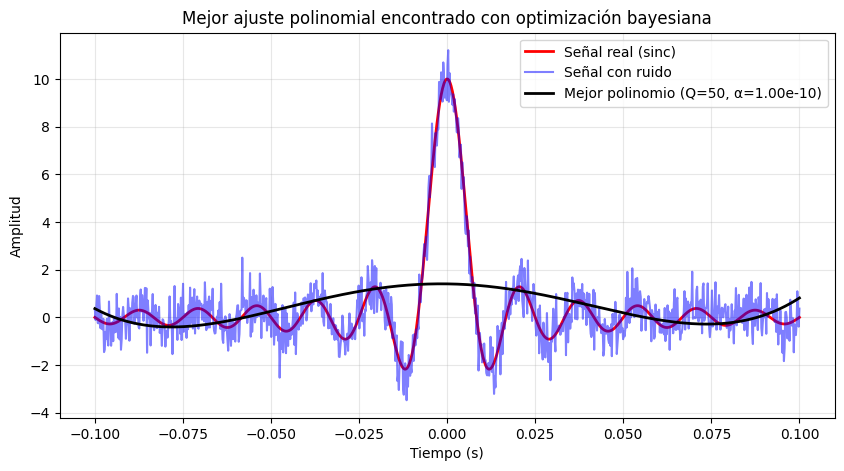

In [33]:
best_degree = study.best_params['degree']
best_alpha = study.best_params['alpha']

# Modelo final con los mejores hiperparámetros
poly_best = PolynomialFeatures(degree=best_degree)
Phi_all = poly_best.fit_transform(X)

best_model = Ridge(alpha=best_alpha)
best_model.fit(poly_best.transform(X_train), y_train)

y_pred_best = best_model.predict(Phi_all)

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(X, y_real, 'r-', linewidth=2, label='Señal real (sinc)')
plt.plot(X, y, 'b-', alpha=0.5, label='Señal con ruido')
plt.plot(X, y_pred_best, 'k-', linewidth=2,
         label=f'Mejor polinomio (Q={best_degree}, α={best_alpha:.2e})')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("Mejor ajuste polinomial encontrado con optimización bayesiana")
plt.show()


In [35]:
# === Visualizing Optuna Results ===
print("Visualizando resultados de Optuna...")

# Plot optimization history
try:
    optuna.visualization.plot_optimization_history(study).show()
except Exception as e:
    print(f"Could not plot optimization history: {e}")

# Plot parameter importantce
try:
    optuna.visualization.plot_param_importances(study).show()
except Exception as e:
    print(f"Could not plot parameter importances: {e}")

# Plot contour of parameters
try:
    optuna.visualization.plot_contour(study, params=['degree', 'alpha']).show()
except Exception as e:
    print(f"Could not plot parameter contour: {e}")

Visualizando resultados de Optuna...
